### Programm #5. BST and Skip List

Written by: Kovalev Alexander  
Department:  MSU, Physics Faculty, Mathematical Modelling and Computer Sciencegr(MMCS), gr. 435    
  

Task: Compare Binary Search tree and Skip List

Implement two frequency dictionary with different data structure
- Binary Search tree
- Skip List

Compare their performance, plotted follow graph:
- x axis: size collections
- y axis: number of comparison by incerting new word

In [1]:
import re
import string
import matplotlib.pyplot as plt
import numpy as np
import random 
import seaborn as sns; sns.set()

In [2]:
import seaborn as sns; sns.set()

### 1) Binary search tree   


In [3]:
class Node_tree:
    idNumber = 0
    def __init__(self, key, value = 1):
        self.left = None
        self.right = None
        self.key = key
        self.value = value
        Node_tree.idNumber += 1
    def get_idNumber():
        return Node_tree.idNumber
    def set_idNumber(value):
        Node_tree.idNumber = value

def incert(root, node, num_compare=0):  
    if root is None:
        root = node
    else:
        if root.key == node.key:
            num_compare += 1
            root.value +=1
            Node_tree.idNumber -= 1
        elif root.key < node.key:
            num_compare += 1
            if root.right is None:
                root.right = node
            else:
                num_compare = incert(root.right, node, num_compare)
        else:
            num_compare += 1
            if root.left is None:
                root.left = node
            else:
                num_compare = incert(root.left, node, num_compare)
    return num_compare
def inorder(root):
    # show our words from left to right
    if root:
        inorder(root.left)
        print(root.key,root.value )
        #dict_words[root.key] = root.value
        inorder(root.right)

### 2) Skip List


In [4]:

import random 

class Node(): 
    idNumber = 0
    def __init__(self, key, level): 
        self.key = key 
        self.value = 1 
        self.forward = [None]*(level+1) 
        Node.idNumber += 1
    def set_idNumber(value):
        Node.idNumber = value
    def get_idNumber():
        return Node.idNumber
        
        

class SkipList(object): 
    def __init__(self, max_lvl, P): 
        self.MAXLVL = max_lvl   
        self.P = P 
        # create header node and initialize key to ''
        self.header = self.createNode(self.MAXLVL, '') 
        self.level = 0
    
    def createNode(self, lvl, key): 
        n = Node(key, lvl) 
        return n 
      
    # create random level for node 
    def randomLevel(self): 
        lvl = 0
        while random.random()<self.P and lvl<self.MAXLVL:
            lvl += 1
        return lvl 
    
    # insert given key in skip list 
    def show_dict(self):
        current = self.header
        print(current.key, current.value)
        while current.forward[0]:
            print(current.key, current.value)
            current = current.forward[0]
        
    def insertElement(self, key): 
        num_compares = 0
        update = [None]*(self.MAXLVL+1) 
        current = self.header
                
        for i in range(self.level, -1, -1): 
            while current.forward[i] and current.forward[i].key < key: 
                num_compares += 1
                current = current.forward[i] 
            num_compares += 1
            update[i] = current 
        
        current = current.forward[0] 
        
        num_compares += 1
        if current is None or current.key != key: 
            # Generate a random level for node 
            rlevel = self.randomLevel() 
            #num_compares += 1
            if rlevel > self.level: 
                for i in range(self.level+1, rlevel+1): 
                    update[i] = self.header 
                self.level = rlevel 
            n = self.createNode(rlevel, key) 
           # insert node by rearranging references  
            for i in range(rlevel+1): 
                n.forward[i] = update[i].forward[i] 
                update[i].forward[i] = n 
        else:
            current.value += 1
        return num_compares
    


### 3) Minimal preprocessing

In [5]:
kant_file = open("Kritika.txt", "r")
data = kant_file.read() # len = 25507
kant_file.close()

def clean_txt(input_str):
    input_to_lower = input_str.lower() 
    input_no_digit = re.sub(r'\d+', '', input_to_lower) # without digits
    clean_input = input_no_digit.translate(str.maketrans("","", string.punctuation)) # clean punctuations
    return clean_input.split()

clean_data = clean_txt(data)
print("Количество слов {},\nКоличество символов {} \nКоличество уникальных слов {}".format(len(clean_data),
                                                                                           len(data), len(set(clean_data))))
    

Количество слов 59822,
Количество символов 429317 
Количество уникальных слов 8037


### 4) Compare tree and skip list

#### Estimation functions

In [6]:
def estimate_tree(clean_data):
    """Input: clean text
       Output: num_compares, tree_sizes
    """
    Node_tree.set_idNumber(0) # zero outr counter of unique keys in tree
    num_compares = []
    tree_sizes = []

    root_kant = Node_tree(clean_data[0])
    for word in clean_data:
        num_compares.append(incert(root_kant, Node_tree(word)))
        tree_sizes.append(Node_tree.get_idNumber())
    return num_compares, tree_sizes
    
def estimate_list(clean_data):
    """Input: clean text
       Output: num_compares, tree_sizes
    """
    Node.set_idNumber(0) # zero outr counter of unique keys in tree
    num_compares = []
    list_size = []
    lst = SkipList(1500, 0.2)

    for word in clean_data:
        num_compares.append(lst.insertElement(word))
        list_size.append(Node.get_idNumber())
        
    return num_compares, list_size   

In [7]:
compares_array_tree, sizes_array_tree =  estimate_tree(clean_data)
compares_array_list, sizes_array_list =  estimate_list(clean_data)

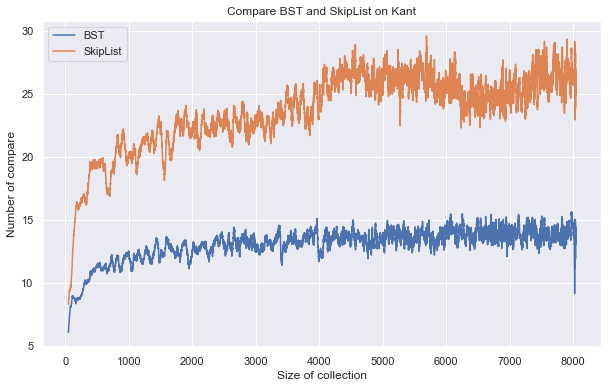

In [8]:
N = 110
#for BST
average_compare_tree = np.convolve(compares_array_tree, np.ones((N,))/N, mode='valid')
average_sizes_tree = np.convolve(sizes_array_tree, np.ones((N,))/N, mode='valid')
#for SkipList with MaxLevel = 500, p = 0.5
average_compare_list = np.convolve(compares_array_list, np.ones((N,))/N, mode='valid')
average_sizes_list = np.convolve(sizes_array_list, np.ones((N,))/N, mode='valid')

plt.figure(figsize = (10,6))

plt.plot(average_sizes_tree, average_compare_tree, label = 'BST')
plt.plot(average_sizes_list, average_compare_list, label = 'SkipList')



#text stuff
plt.title("Compare BST and SkipList on Kant")
plt.xlabel("Size of collection")
plt.ylabel("Number of compare")
plt.legend()


Try to use another text

In [9]:
dost_file = open("bratya-karamazovy.txt", "r")
data = dost_file.read() 
dost_file.close()

def clean_txt(input_str):
    input_to_lower = input_str.lower() 
    input_no_digit = re.sub(r'\d+', '', input_to_lower) # without digits
    clean_input = input_no_digit.translate(str.maketrans("","", string.punctuation)) # clean punctuations
    return clean_input.split()

clean_data_dost = clean_txt(data)
print("Количество слов {}, Количество символов {}".format(len(clean_data),len(data)))

Количество слов 59822, Количество символов 1818247


In [10]:
print(" Number of unique words in text:", len(set(clean_data_dost)), 
      '\n First word: ', clean_data_dost[0])

 Number of unique words in text: 40045 
 First word:  начиная


In [11]:
compares_array_tree, sizes_array_tree =  estimate_tree(clean_data_dost)
compares_array_list, sizes_array_list =  estimate_list(clean_data_dost)

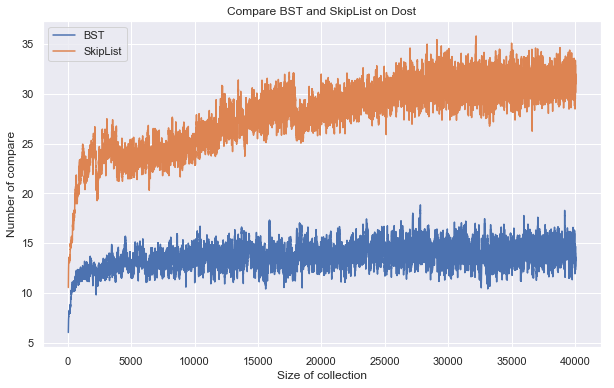

In [12]:
N = 100
#for BST
average_compare_tree = np.convolve(compares_array_tree, np.ones((N,))/N, mode='valid')
average_sizes_tree = np.convolve(sizes_array_tree, np.ones((N,))/N, mode='valid')
#for SkipList with MaxLevel = 500, p = 0.5
average_compare_list = np.convolve(compares_array_list, np.ones((N,))/N, mode='valid')
average_sizes_list = np.convolve(sizes_array_list, np.ones((N,))/N, mode='valid')

plt.figure(figsize = (10,6))

plt.plot(average_sizes_tree, average_compare_tree, label = 'BST')
plt.plot(average_sizes_list, average_compare_list, label = 'SkipList')



#text stuff
plt.title("Compare BST and SkipList on Dost")
plt.xlabel("Size of collection")
plt.ylabel("Number of compare")
plt.legend()
